<a href="https://colab.research.google.com/github/diogospmgds/random-/blob/main/FinalDraftDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
bank = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
ro = RandomOverSampler()


X = pd.DataFrame()
features = ['job','housing','poutcome', 'education'] #'job','marital','education', 'default', 'housing','contact','poutcome'
X = pd.get_dummies(bank[features], drop_first=True)
X= X.drop(columns=['education_illiterate', 'job_self-employed', 'job_unemployed'])
X['age'] = bank['age']
X['campaign'] = bank['campaign']
#X['previous'] = bank['previous']
#X['pdays'] = bank['pdays']
X['euribor3m'] = bank['euribor3m']
#X['nr.employed'] = bank['nr.employed']
#X['emp.var.rate'] = bank['emp.var.rate']
y = bank['y']
#print(X.describe())

X_new, y_new = ro.fit_resample(X, y)
# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=92)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=15, max_depth=6)
# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

In [ ]:
model.score(X_test, y_test)

0.7333772886341735

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = list(X.columns),
                class_names = list(y.unique()),
                rounded = True, proportion = True, 
                precision = 2, filled = True)

In [ ]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [ ]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
bank = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv")

X = pd.DataFrame()
features = ['job','housing','poutcome', 'education'] #'job','marital','education', 'default', 'housing','contact','poutcome'
X = pd.get_dummies(bank[features], drop_first=True)
X= X.drop(columns=['education_illiterate', 'job_self-employed', 'job_unemployed'])
X['age'] = bank['age']
X['campaign'] = bank['campaign']
#X['previous'] = bank['previous']
#X['pdays'] = bank['pdays']
X['euribor3m'] = bank['euribor3m']

bob = model.predict(X)
pd.DataFrame({"predictions" : pd.Series(np.where(bob == "yes", 1 ,0))}).to_csv("team5-module2-predictions.csv", index = False)

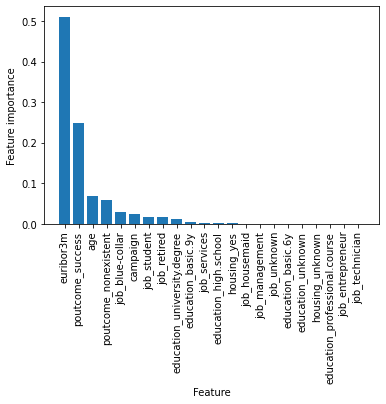

In [ ]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Sort the features by importance
sorted_features = X.columns[indices]

# Plot the feature importance scores
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.show()